### <span style = 'color:blue'> TimeSeries</span>
#### <span style = 'color:blue'>Use any forecasting method to predict Footfalls from the given dataset  </span>

For Data set please click here <a href="https://drive.google.com/file/d/1zlhACuGnjEuQCuv1Znk2yh1zcbS1wXDs/view?usp=sharing" title="Google Drive">Click here</a>

The given data is about Footfaals and we have 158 rows and here we have foot falls from 1709 to 2132 
here we have time interval as months
predict the data using any forecasting method for next 10 footfalls values

**data should 70% for training and 30% testing**

**Expected results**

- **check for dicky fuller test, rolling mean and stationarity**
- **obtain scores and interpret it**
- **predict the data or plot the graph that can plot predicted data with actual data**

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt



In [2]:
# Load the dataset
data = pd.read_csv('footfalls.csv')

# Split the data into training and testing sets
train_size = int(len(data) * 0.7)
train_data, test_data = data[:train_size], data[train_size:]

print("Training set size:", len(train_data))
print("Testing set size:", len(test_data))

Training set size: 111
Testing set size: 48


In [5]:
# Perform Dickey-Fuller test on training data
print("Dickey-Fuller test results for training data:")
adf_test(train_data['Footfalls'])


Dickey-Fuller test results for training data:
ADF Statistic: -1.06847484385577
p-value: 0.7274786897402201
Critical Values:
	1%: -3.4989097606014496
	5%: -2.891516256916761
	10%: -2.5827604414827157
Fail to Reject Null Hypothesis: Data is non-stationary


In [6]:
# Calculate first difference
first_difference = train_data['Footfalls'].diff().dropna()

# Perform Dickey-Fuller test on first difference
print("Dickey-Fuller test results for first difference:")
adf_test(first_difference)


Dickey-Fuller test results for first difference:
ADF Statistic: -4.504282442654768
p-value: 0.00019316583174761457
Critical Values:
	1%: -3.4989097606014496
	5%: -2.891516256916761
	10%: -2.5827604414827157
Reject Null Hypothesis: Data is stationary


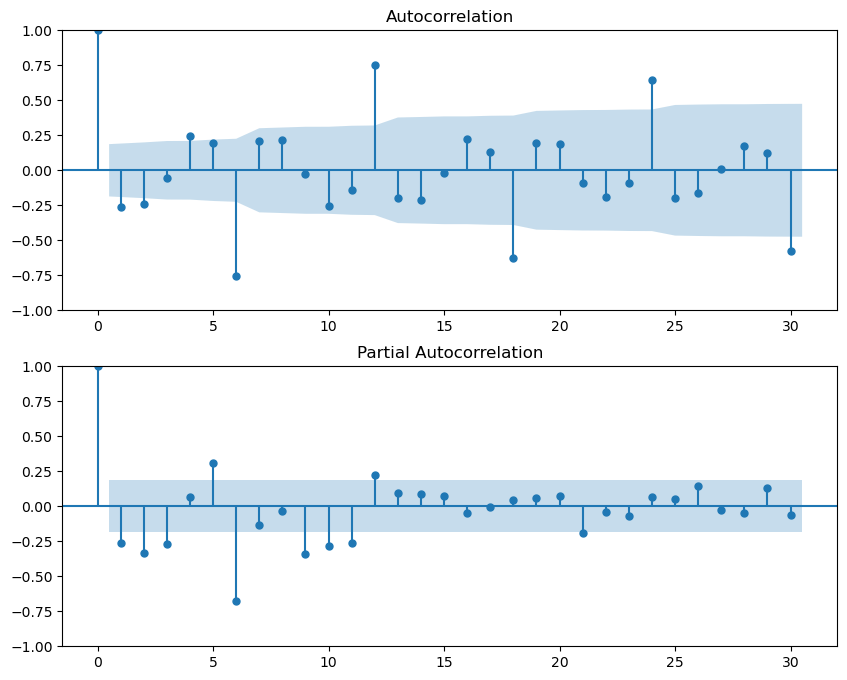

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for first difference
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(first_difference, ax=ax1, lags=30)
plot_pacf(first_difference, ax=ax2, lags=30)
plt.show()


In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
p, d, q = 1, 1, 1  # Example values, you may adjust based on ACF and PACF plots
model = ARIMA(train_data['Footfalls'], order=(p, d, q))
arima_result = model.fit()

# Make predictions
predictions = arima_result.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, typ='levels')

# Print predictions
print("Predicted footfall values:")
print(predictions)


Predicted footfall values:
111    1819.227370
112    1783.468178
113    1770.779020
114    1766.276269
115    1764.678467
116    1764.111486
117    1763.910293
118    1763.838900
119    1763.813566
120    1763.804576
121    1763.801386
122    1763.800254
123    1763.799852
124    1763.799710
125    1763.799659
126    1763.799641
127    1763.799635
128    1763.799632
129    1763.799632
130    1763.799631
131    1763.799631
132    1763.799631
133    1763.799631
134    1763.799631
135    1763.799631
136    1763.799631
137    1763.799631
138    1763.799631
139    1763.799631
140    1763.799631
141    1763.799631
142    1763.799631
143    1763.799631
144    1763.799631
145    1763.799631
146    1763.799631
147    1763.799631
148    1763.799631
149    1763.799631
150    1763.799631
151    1763.799631
152    1763.799631
153    1763.799631
154    1763.799631
155    1763.799631
156    1763.799631
157    1763.799631
158    1763.799631
Name: predicted_mean, dtype: float64


C:\Users\subramanya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\subramanya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate evaluation metrics
mae = mean_absolute_error(test_data['Footfalls'], predictions)
mse = mean_squared_error(test_data['Footfalls'], predictions)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Mean Absolute Error: 225.81900304397743
Mean Squared Error: 65947.67642622699
Root Mean Squared Error: 256.8027967648074
